In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# !wget -q http://www.yoursite.com/file.csv

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Data/Reviews.csv')
# df.head()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
df['helpPercent']=np.where(df['HelpfulnessNumerator']>0 ,df['HelpfulnessNumerator']/df['HelpfulnessDenominator'],-1)
# print(df['helpPercent'].unique())
# df.head()

In [ ]:
df['upvote%'] = pd.cut(df['helpPercent'],bins=[-1,0,0.2,0.4,0.6,0.8,1],labels=['empty','0-20%','0-40%','0-60%','0-80%','0-100%'])

In [ ]:
a = df.groupby(['Score','upvote%']).agg('count')

**creating piviot table **

In [ ]:
g = df.groupby(['Score','upvote%']).agg({'Id' : 'count'})

In [ ]:
df_s=df.groupby(['Score','upvote%']).agg({'Id' : 'count'}).reset_index()

In [ ]:
pivot = df_s.pivot(index='upvote%', columns='Score')

Heatmap

In [ ]:
import seaborn as sns

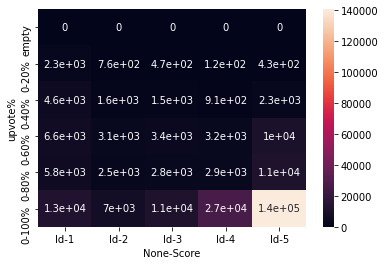

In [ ]:
heatmap = sns.heatmap(pivot,annot=True,)

**Bag of words**

In [ ]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [ ]:
df2 = df[df['Score'] != 3] 
df2=df2.dropna()
df2['Score'].unique()

array([5, 4, 2, 1])

In [ ]:
X = df2['Text'].values.astype('U')

In [ ]:
y_dictionay = {1:0 , 2:0 , 4:1 ,5 :1}
y = df2['Score'].map(y_dictionay)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
c = CountVectorizer(stop_words='english')

In [ ]:
X_c = c.fit_transform(X)

In [ ]:
X_c.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y.shape

In [ ]:
X_c.shape

checking accuracy of a model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_c,y)

In [ ]:
X_train.shape

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()

In [ ]:
ml = log.fit(X_train , y_train)

In [ ]:
ml.score(X_test,y_test)

getting top -ve and +ve words

In [ ]:
words = c.get_feature_names()

In [ ]:
coef = ml.coef_.tolist()[0]

In [ ]:
coef_df = pd.DataFrame({'Word':words,'coefficient' : coef})
coef_df

In [ ]:
coef_df = coef_df.sort_values(['coefficient','Word'],ascending=False)

In [ ]:
coef_df.head(20) # top 20 +ve words

In [ ]:
coef_df.tail(20) #top 20 -ve words